In [20]:
import pandas as pd
import geopandas as gpd
import os
import numpy as np

In [15]:
stats = {"place": [], "type1": [], "type2": [], "area": []}
df = pd.DataFrame()

for file in os.listdir("./dataset/raw_unprocessed/green_spaces"):
    place = file.split("_")[0]
    type1 = file.split("_")[1]
    type2 = "_".join(file.replace(".parquet", "").replace("_ALL", "").split("_")[2:])

    stats["place"].append(place)
    stats["type1"].append(type1)
    stats["type2"].append(type2)

    x = gpd.read_parquet(f"./dataset/raw_unprocessed/green_spaces/{file}")
    x.crs = "EPSG:25832"
    x["place"] = place
    x["type1"] = type1
    x["type2"] = type2
    x["area"] = x[["geometry"]].area
    df = pd.concat([df, x])
    

In [27]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df[["type1", "type2", "area"]].groupby(["type1", "type2"]).agg(Total=("area", np.sum), AVG=("area", np.mean), STD=("area", np.std)).reset_index()

C:\Users\ginof\AppData\Local\Temp\ipykernel_2148\389643662.py:2: FutureWarning: The provided callable <function sum at 0x00000267F41FA0E0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df[["type1", "type2", "area"]].groupby(["type1", "type2"]).agg(Total=("area", np.sum), AVG=("area", np.mean), STD=("area", np.std)).reset_index()
C:\Users\ginof\AppData\Local\Temp\ipykernel_2148\389643662.py:2: FutureWarning: The provided callable <function mean at 0x00000267F41FB010> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df[["type1", "type2", "area"]].groupby(["type1", "type2"]).agg(Total=("area", np.sum), AVG=("area", np.mean), STD=("area", np.std)).reset_index()
C:\Users\ginof\AppData\Local\Temp\ipykernel_2148\389643662.py:2: FutureWarning: The

,type1,type2,Total,AVG,STD
0,amenity,grave_yard,0.00102,0.00000,0.00000
1,landuse,allotments,0.00352,0.00001,0.00001
2,landuse,basin,0.00049,0.00000,0.00000
3,landuse,cemetery,0.00187,0.00000,0.00000
4,landuse,farmland,1.85264,0.00002,0.00004
5,landuse,flowerbed,0.00001,0.00000,0.00000
6,landuse,forest,0.76511,0.00001,0.00006
7,landuse,grass,0.01446,0.00000,0.00000
8,landuse,greenfield,0.00868,0.00001,0.00002
9,landuse,meadow,0.20737,0.00000,0.00002


<Axes: >

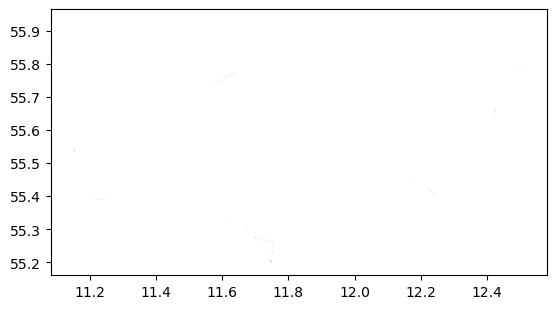

In [29]:
x.plot()